In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("n_learn_evaluting_FaultInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.117605,0,0.059252,0
1,0,1,4.248186,0,0.114350,0
2,0,2,0.524208,0,0.074480,0
3,0,3,1.154959,0,0.065995,0
4,0,4,0.429342,0,0.071878,0


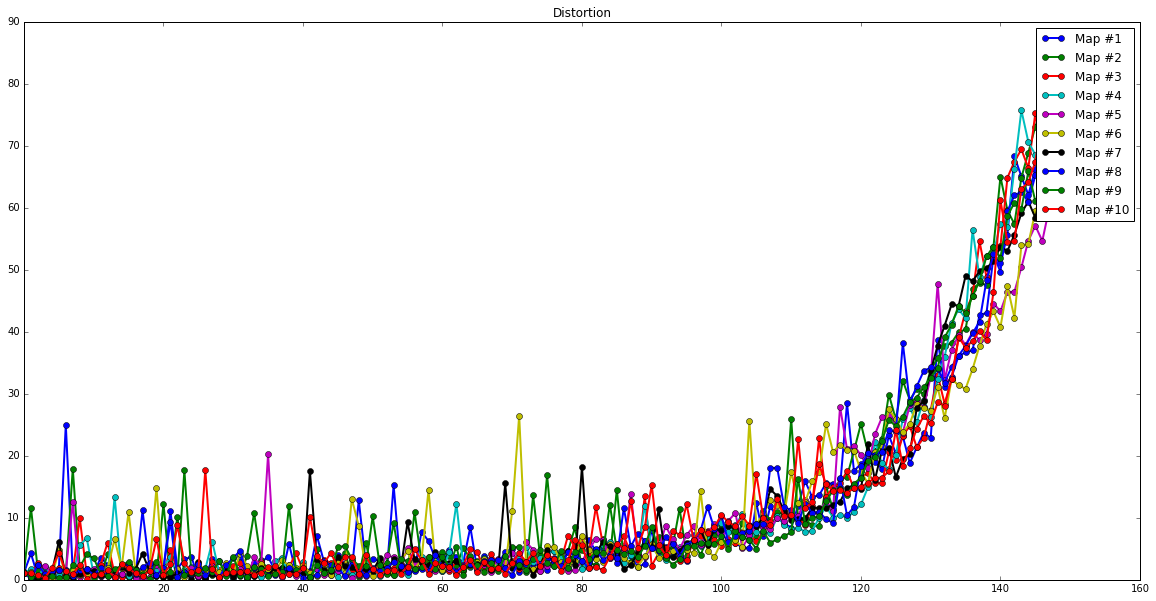

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

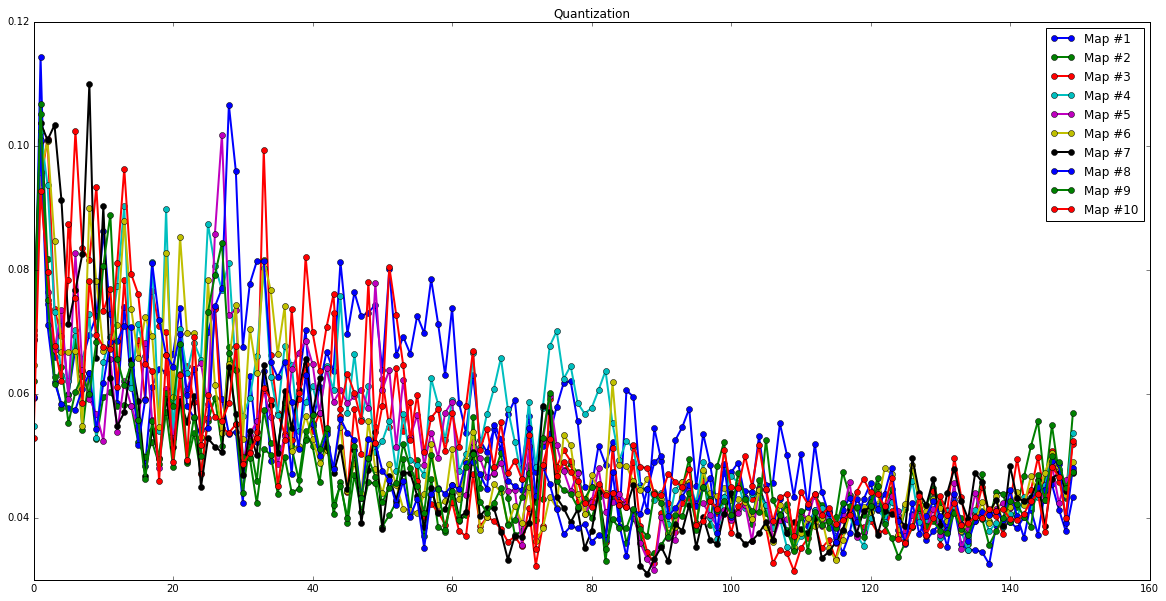

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1),
             marker='o', linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [6]:
df_v = pd.read_csv("n_valid_evaluting_FaultInj.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.136438,0,0.061756,0
1,0,1,4.576918,0,0.114166,0
2,0,2,0.650455,0,0.089394,0
3,0,3,1.663166,0,0.067508,0
4,0,4,1.053376,0,0.080181,0


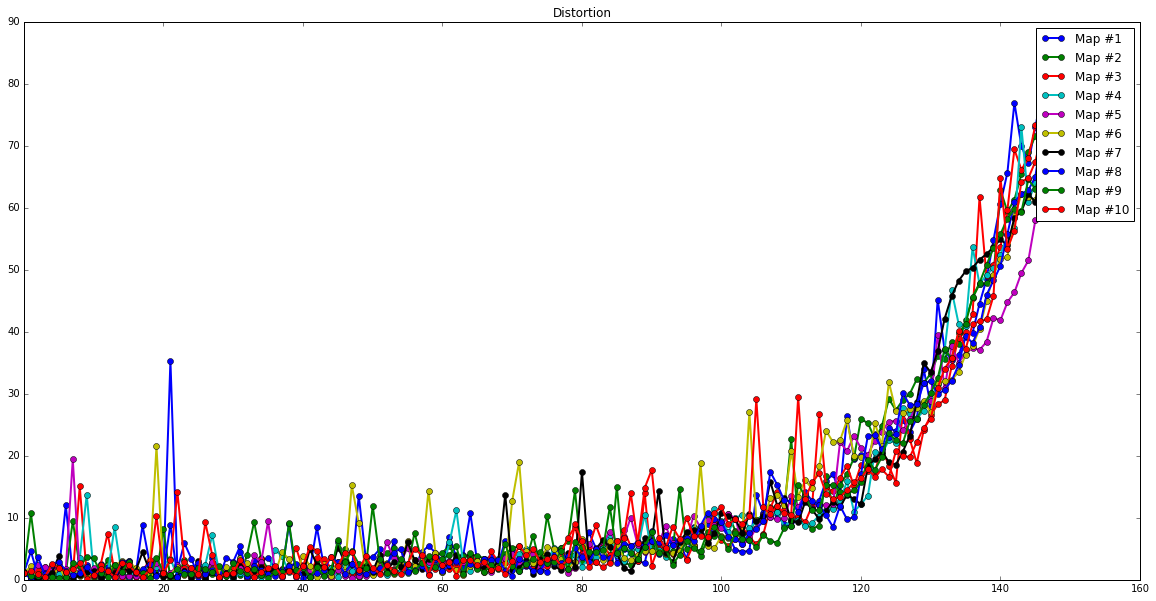

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

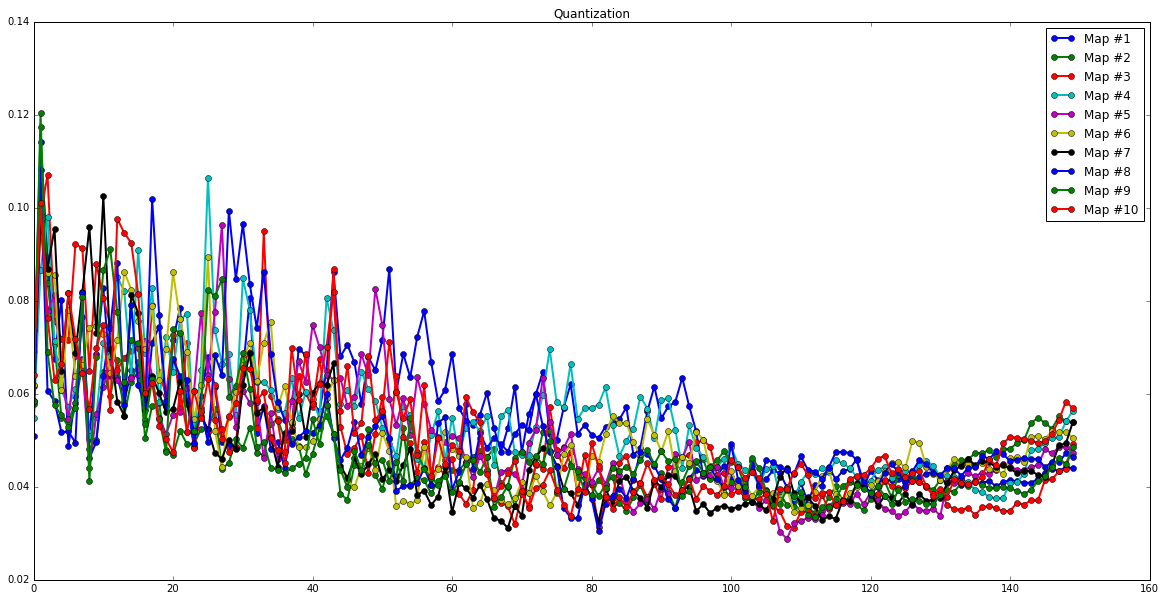

In [8]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), 
             marker='o',
            linewidth=2.0)
    plt.legend()

In [11]:
df_s = pd.read_csv("n_statistics_FaultInj.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.047704,0,0.264412,0,78.69056,0,1059.283548,0,0.004605,0,0.080777,0,7.049707,0,131.517349,0
4526,150,26,0.047704,0,0.284350,0,78.69056,0,1094.322213,0,0.004605,0,0.116584,0,7.049707,0,133.203049,0
4527,150,27,0.047704,0,0.335477,0,78.69056,0,1142.408660,0,0.004605,0,0.162632,0,7.049707,0,148.513931,0
4528,150,28,0.047704,0,0.359703,0,78.69056,0,1194.592996,0,0.004605,0,0.186582,0,7.049707,0,157.010117,0
4529,150,29,0.047704,0,0.400623,0,78.69056,0,1251.290180,0,0.004605,0,0.208737,0,7.049707,0,175.595963,0


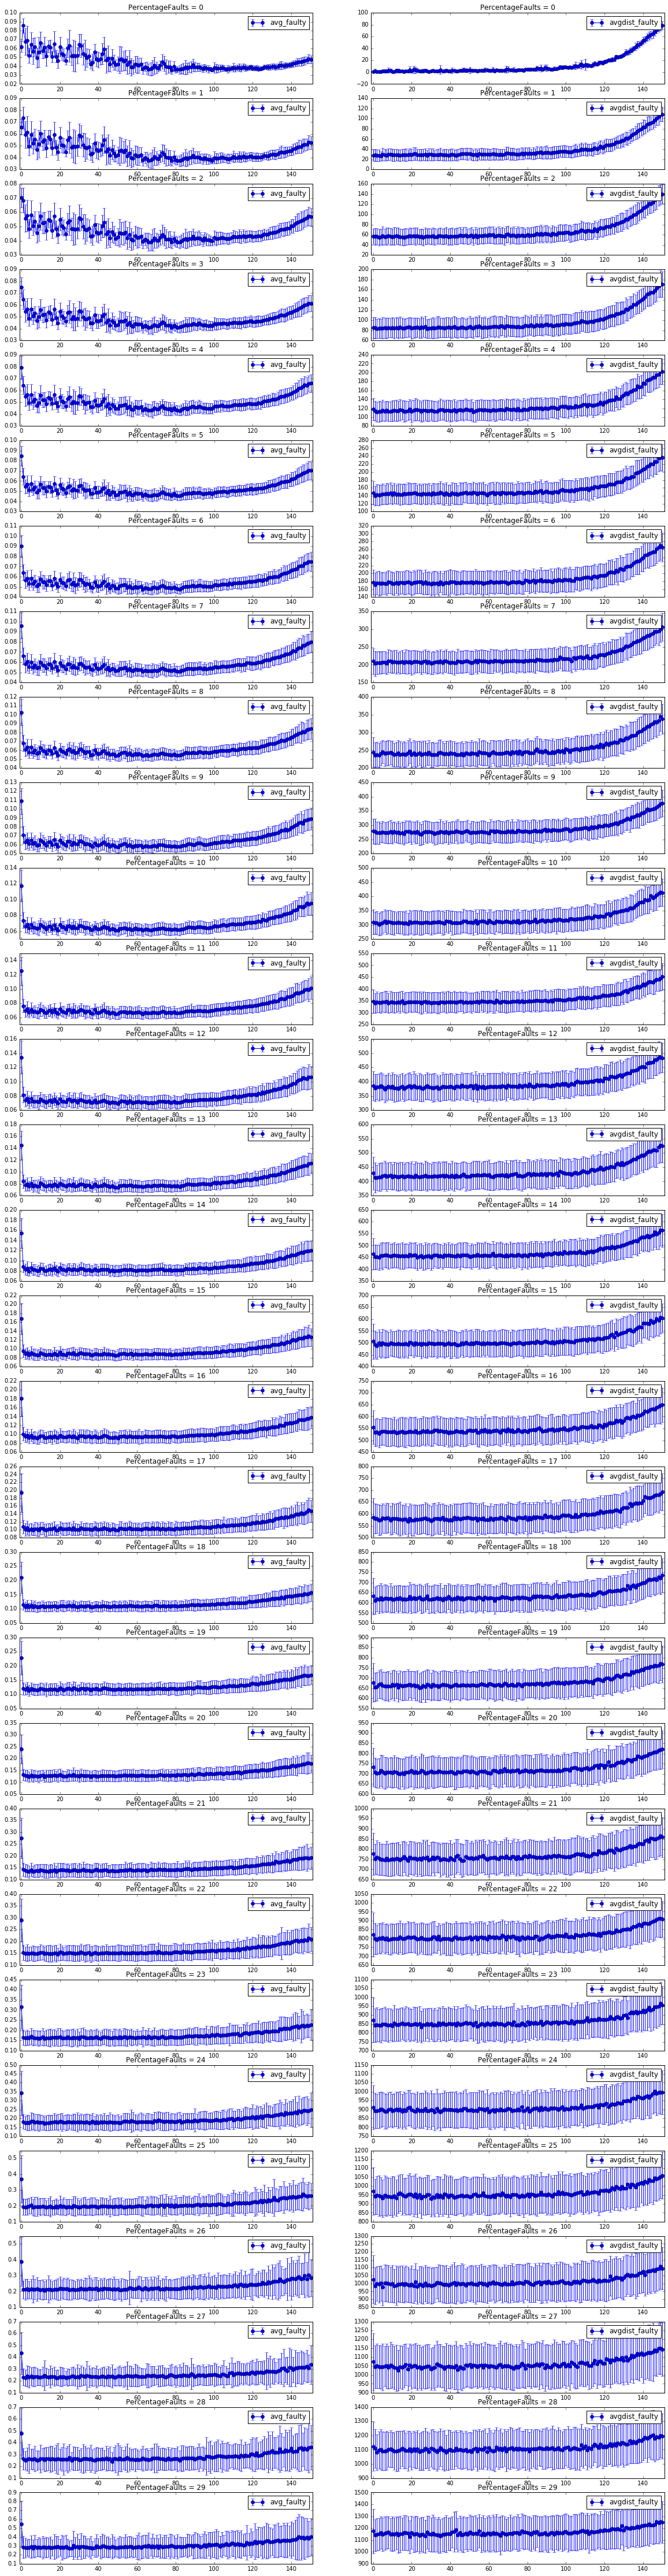

In [10]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1